# Classification - k-nearest-neighbors - Major Occupation

In [1]:
# Import all utitlised libraries
from sklearn import neighbors, datasets
import pandas as pd
import sys
sys.path.append('../resources')
from w6support import plot_2d_class       
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap
import itertools
import re, string
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib
matplotlib.style.use('ggplot') 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Next we import and further prepare our data by evaluating the columns.

In [2]:
originalDF = pd.read_csv('occupationFeatureSubset.csv')

# Next we check the Major_Occupation options in the dataset for use with classification
print(originalDF.Major_Occupation.unique())

# Now we replace those values with integers for use with the classification algorithm
occupation_values = {"Major_Occupation": {"Professional": 1, "Education": 2, "Computer": 3, "Other": 4, "Management": 5}}
originalDF.replace(occupation_values, inplace=True)

featureDF = originalDF[originalDF.columns.difference(['Major_Occupation', 'Unnamed: 0'])]
featureDF.head(5)

['Professional' 'Education' 'Computer' 'Other' 'Management']


Actual_Time  Age  Country  Household_Income  Marital_Status  \
0           14   31      114                 7               1   
1           13   18      114                 8               5   
2           34   15       31                 7               3   
3           40   18       41                 4               3   
4           24    7       88                 8               5   

   Primary_Computing_Platform  Primary_Place_of_WWW_Access  \
0                           3                            5   
1                          10                            2   
2                          10                            5   
3                          10                            2   
4                          10                            4   

   Who_Pays_for_Access_Parents  Who_Pays_for_Access_School  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   

   Willingness_to_Pay_Fees  
0                        4  
1                        0  
2                        4  
3                        0  
4                        0

In [3]:
X, y = featureDF, originalDF['Major_Occupation']

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

We will do an initial test of KNeighborsClassifier first to check that prediction is happening with the feature set. As you can see, the predict() function just picks the most likely label. I have encoded the occupation categories, so use a decoder method to view the Category result from the prediction params.

In [4]:
# call the "predict" method on our randomised prediction values :
result = knn.predict([[14,31,114,7,1,3,5,0,0,4]])

for key, val in occupation_values['Major_Occupation'].items():
    if val == result:
        print(key)

Education


In [5]:
knn.predict_proba([[14,31,114,7,1,3,5,0,0,4]])

array([[0.4, 0.6, 0. , 0. , 0. ]])

Remember: the label (1,2,3,4,5) maps to Professional' 'Education' 'Computer' 'Other' 'Management'. Therefore, the probability that it is Professional' 'Education' 'Computer' 'Other' 'Management' is 0.2, 0. , 0.4, 0.2, 0.2, respectively. In this resultset Computer is chosen.

In the next block of code, we take predictor pairs and use the k-nearest-neighbour algorithm with k=3,5,7. 

Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_ActualTime_Age.pdf
Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_ActualTime_Country.pdf
Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_ActualTime_HouseholdIncome.pdf
Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_ActualTime_MaritalStatus.pdf
Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_ActualTime_PrimaryComputingPlatform.pdf
Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_ActualTime_PrimaryPlaceOfWwwAccess.pdf
Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_ActualTime_WhoPaysForAccessParents.pdf
Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_ActualTime_WhoPaysForAccessSchool.pdf
Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_ActualTime_WillingnessToPayFees.pdf
Plotting file k-nearest/majoroccupation/

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_Country_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_Country_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_Country_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_HouseholdIncome_MaritalStatus.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_HouseholdIncome_PrimaryComputingPlatform.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_HouseholdIncome_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_HouseholdIncome_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_HouseholdIncome_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_HouseholdIncome_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_MaritalStatus_PrimaryComputingPlatform.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_MaritalStatus_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_MaritalStatus_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_MaritalStatus_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_MaritalStatus_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_PrimaryComputingPlatform_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_PrimaryComputingPlatform_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_PrimaryComputingPlatform_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_PrimaryComputingPlatform_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_PrimaryPlaceOfWwwAccess_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_PrimaryPlaceOfWwwAccess_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_PrimaryPlaceOfWwwAccess_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_WhoPaysForAccessParents_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_WhoPaysForAccessParents_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_3_nearest-neighbours_Occupation_WhoPaysForAccessSchool_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_ActualTime_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_ActualTime_Country.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_ActualTime_HouseholdIncome.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_ActualTime_MaritalStatus.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_ActualTime_PrimaryComputingPlatform.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_ActualTime_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_ActualTime_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_ActualTime_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_ActualTime_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_Age_Country.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_Age_HouseholdIncome.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_Age_MaritalStatus.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_Age_PrimaryComputingPlatform.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_Age_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_Age_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_Age_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_Age_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_Country_HouseholdIncome.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_Country_MaritalStatus.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_Country_PrimaryComputingPlatform.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_Country_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_Country_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_Country_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_Country_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_HouseholdIncome_MaritalStatus.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_HouseholdIncome_PrimaryComputingPlatform.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_HouseholdIncome_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_HouseholdIncome_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_HouseholdIncome_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_HouseholdIncome_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_MaritalStatus_PrimaryComputingPlatform.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_MaritalStatus_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_MaritalStatus_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_MaritalStatus_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_MaritalStatus_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_PrimaryComputingPlatform_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_PrimaryComputingPlatform_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_PrimaryComputingPlatform_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_PrimaryComputingPlatform_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_PrimaryPlaceOfWwwAccess_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_PrimaryPlaceOfWwwAccess_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_PrimaryPlaceOfWwwAccess_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_WhoPaysForAccessParents_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_WhoPaysForAccessParents_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_5_nearest-neighbours_Occupation_WhoPaysForAccessSchool_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_ActualTime_Age.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_ActualTime_Country.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_ActualTime_HouseholdIncome.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_ActualTime_MaritalStatus.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_ActualTime_PrimaryComputingPlatform.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_ActualTime_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_ActualTime_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_ActualTime_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_ActualTime_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_Age_Country.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_Age_HouseholdIncome.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_Age_MaritalStatus.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_Age_PrimaryComputingPlatform.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_Age_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_Age_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_Age_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_Age_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_Country_HouseholdIncome.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_Country_MaritalStatus.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_Country_PrimaryComputingPlatform.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_Country_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_Country_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_Country_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_Country_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_HouseholdIncome_MaritalStatus.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_HouseholdIncome_PrimaryComputingPlatform.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_HouseholdIncome_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_HouseholdIncome_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_HouseholdIncome_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_HouseholdIncome_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_MaritalStatus_PrimaryComputingPlatform.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_MaritalStatus_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_MaritalStatus_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_MaritalStatus_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_MaritalStatus_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_PrimaryComputingPlatform_PrimaryPlaceOfWwwAccess.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_PrimaryComputingPlatform_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_PrimaryComputingPlatform_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_PrimaryComputingPlatform_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_PrimaryPlaceOfWwwAccess_WhoPaysForAccessParents.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_PrimaryPlaceOfWwwAccess_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_PrimaryPlaceOfWwwAccess_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_WhoPaysForAccessParents_WhoPaysForAccessSchool.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_WhoPaysForAccessParents_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting file k-nearest/majoroccupation/k_7_nearest-neighbours_Occupation_WhoPaysForAccessSchool_WillingnessToPayFees.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


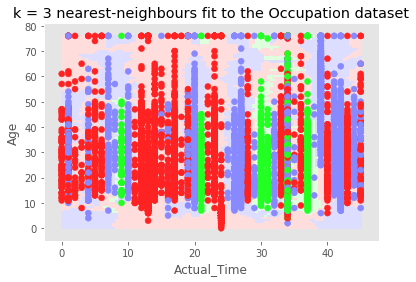

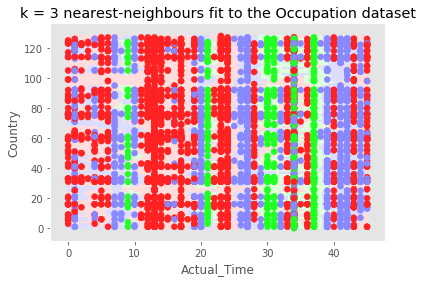

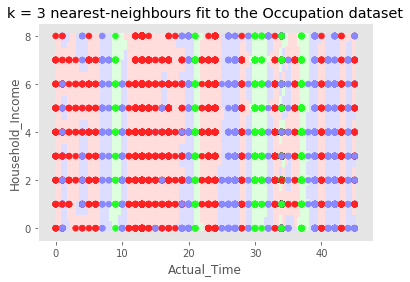

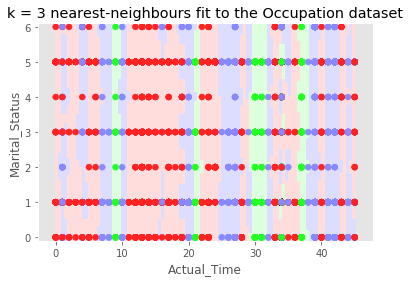

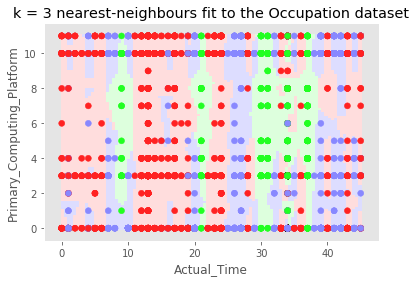

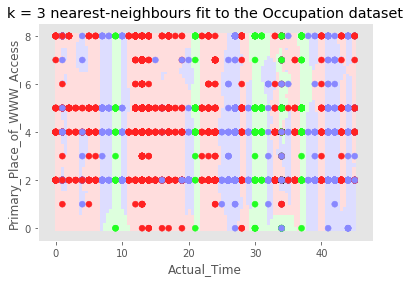

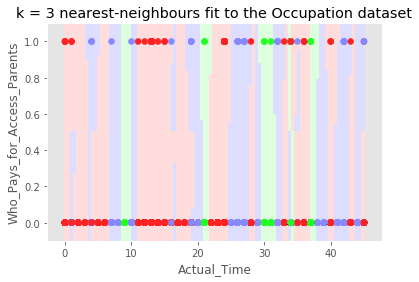

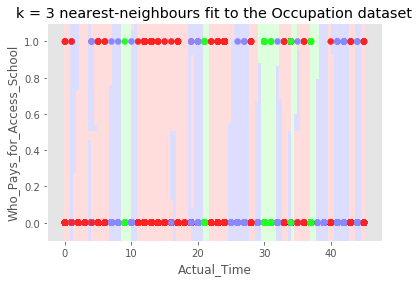

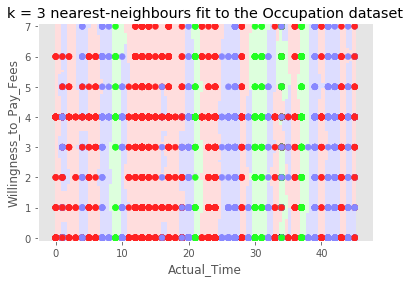

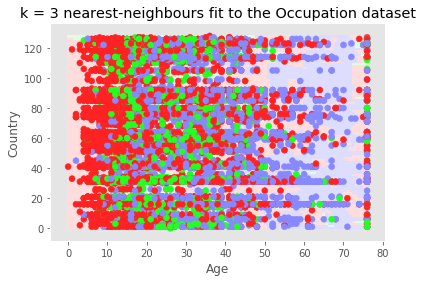

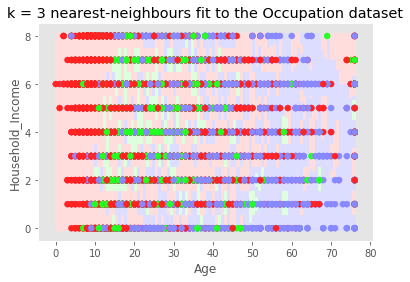

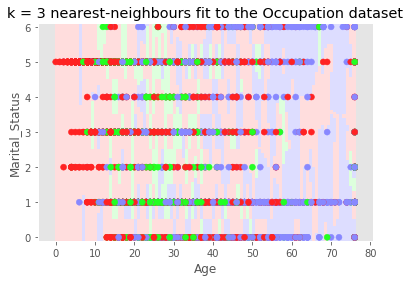

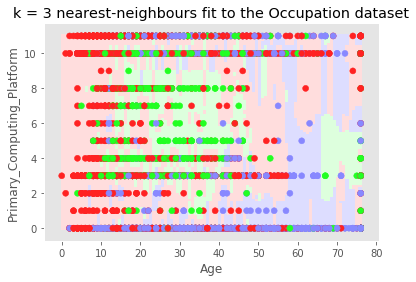

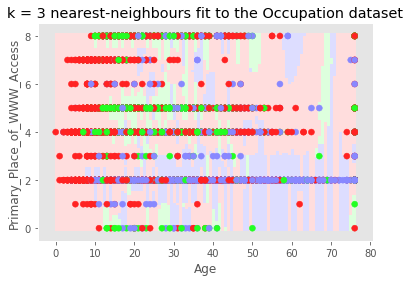

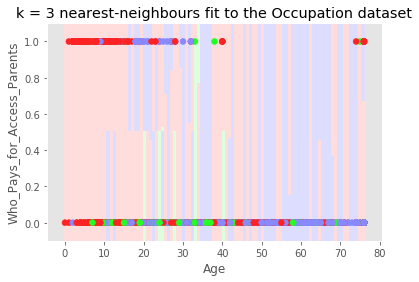

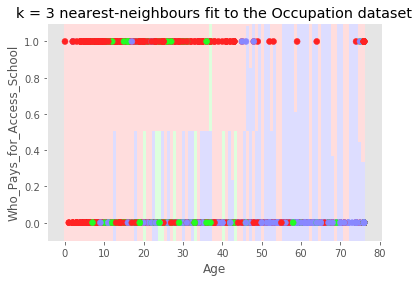

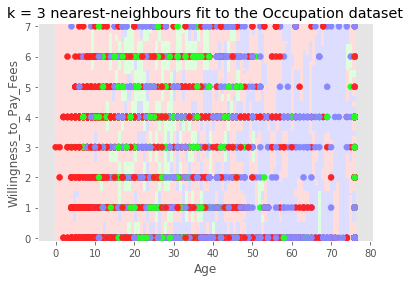

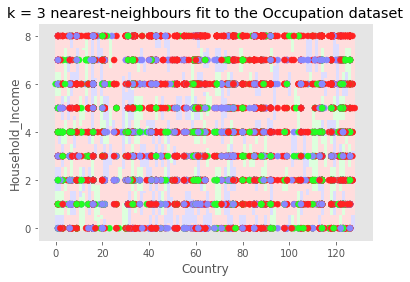

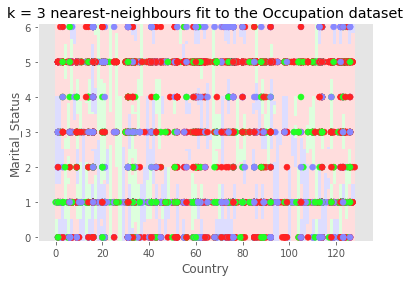

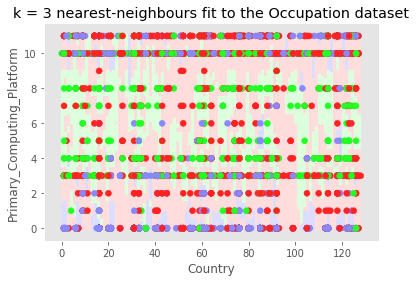

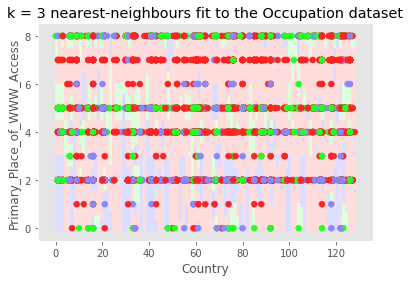

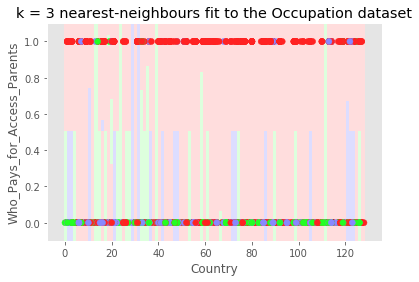

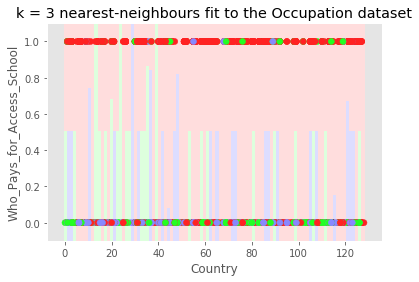

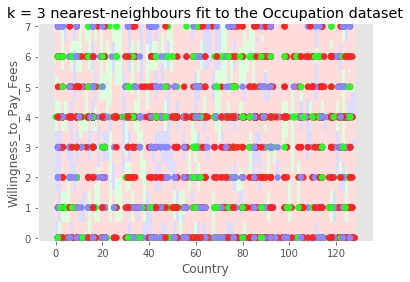

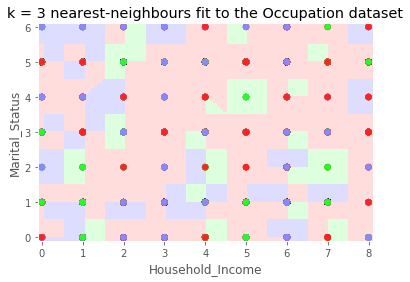

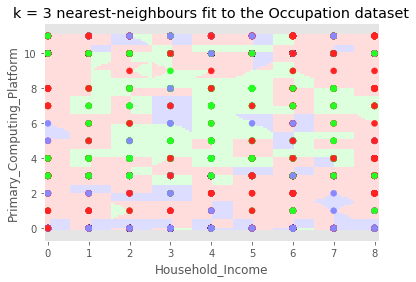

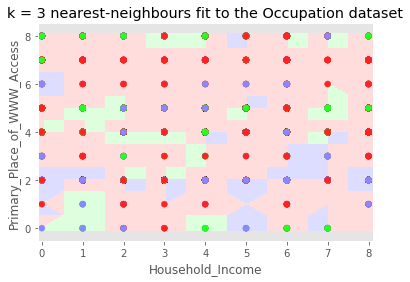

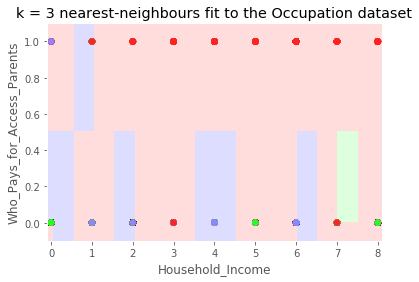

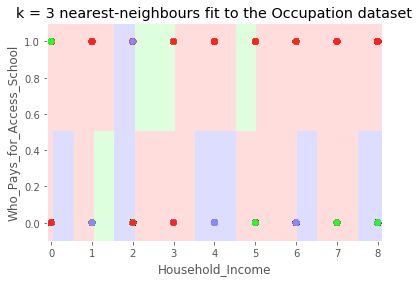

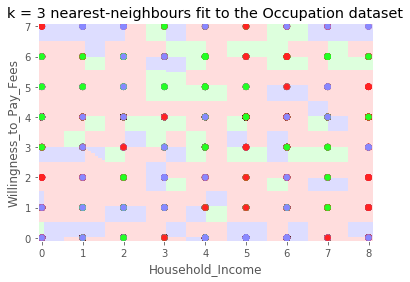

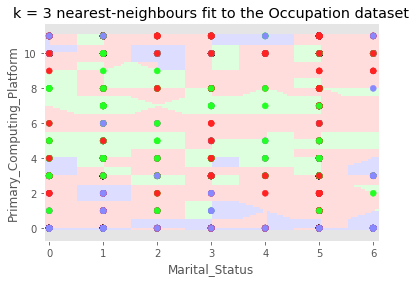

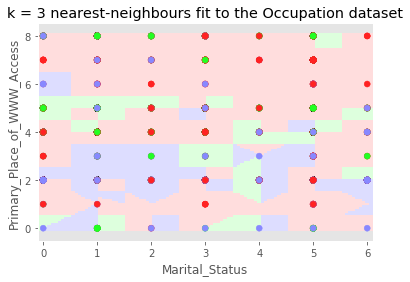

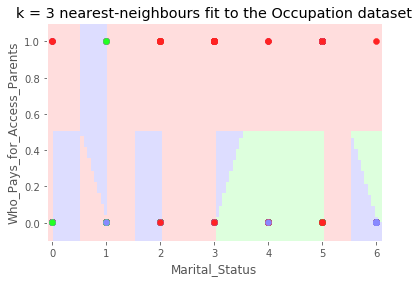

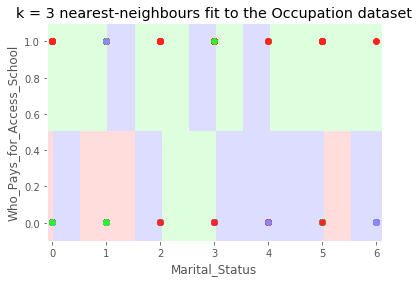

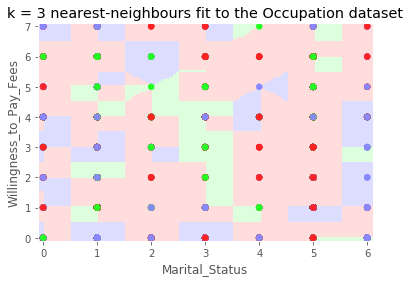

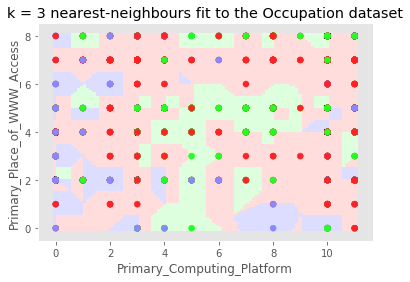

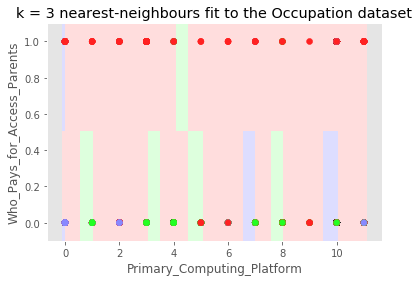

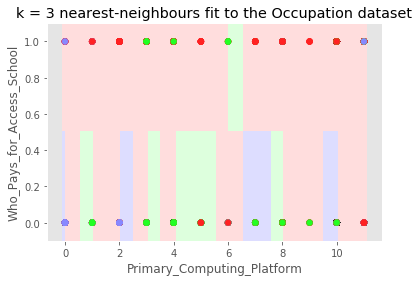

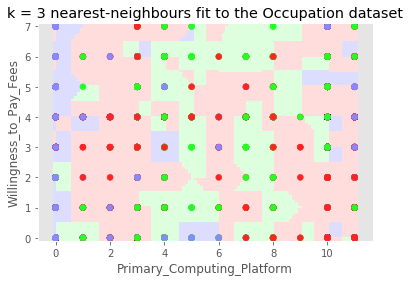

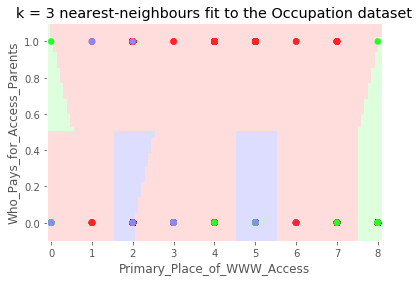

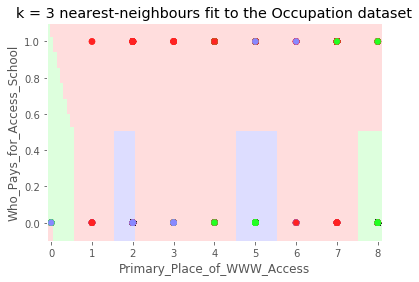

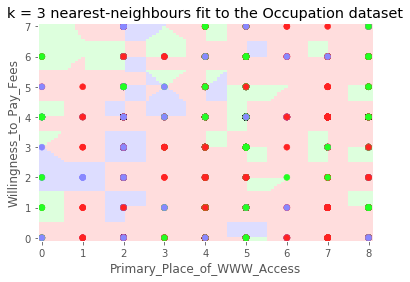

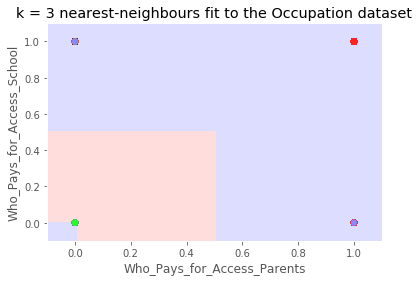

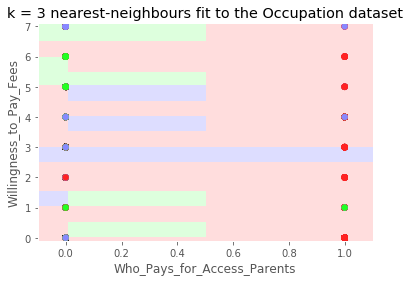

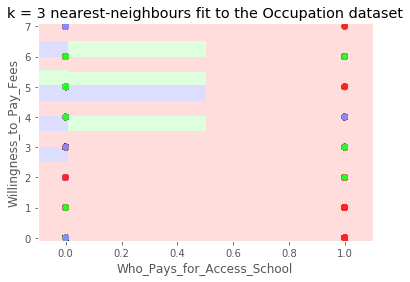

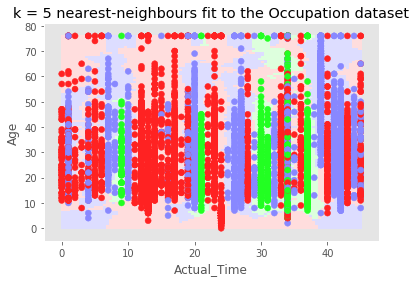

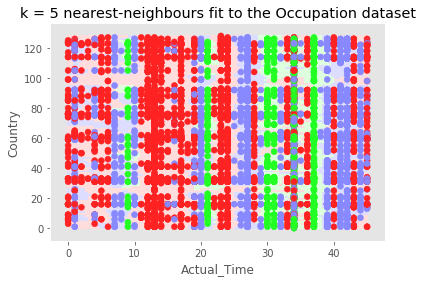

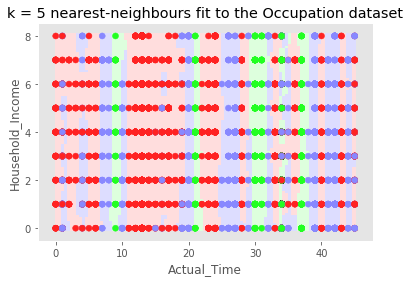

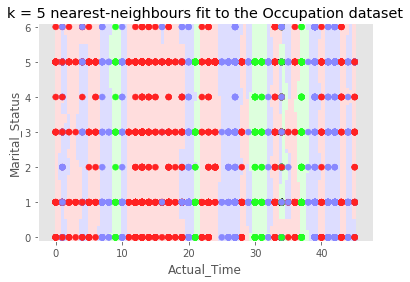

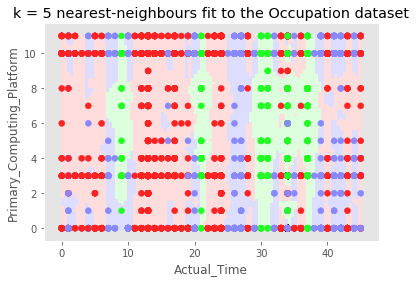

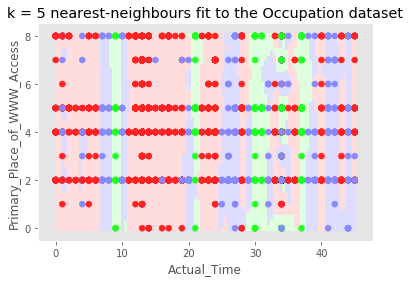

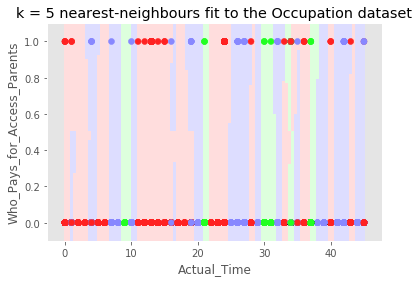

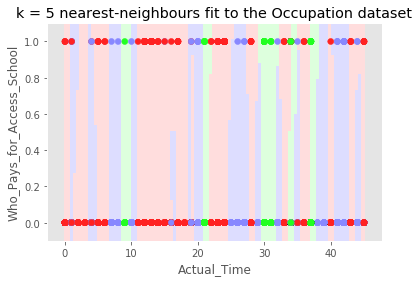

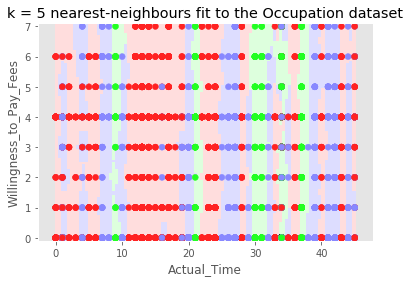

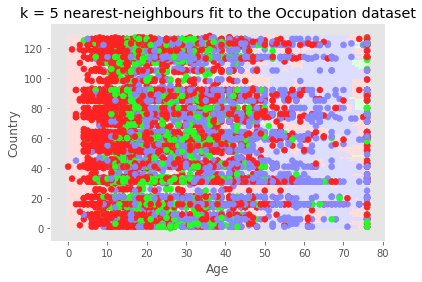

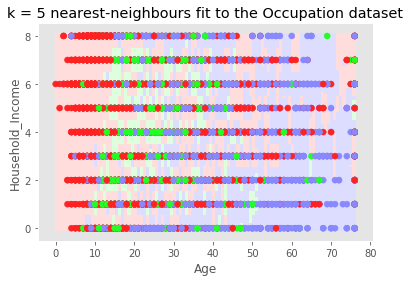

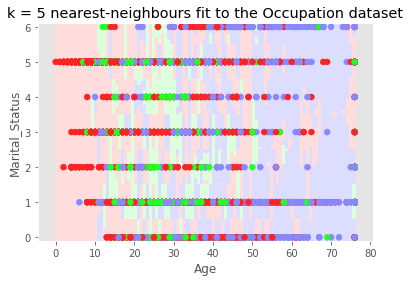

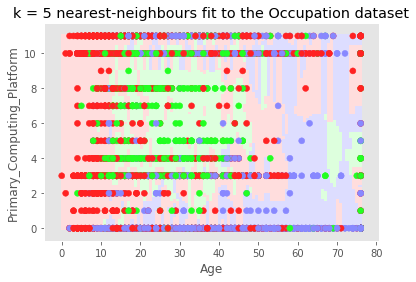

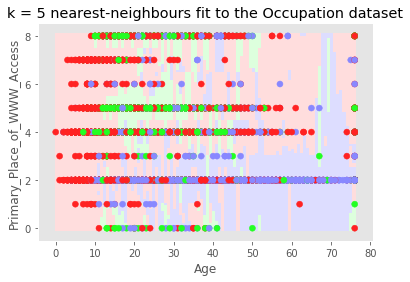

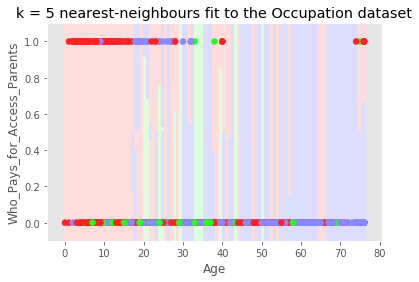

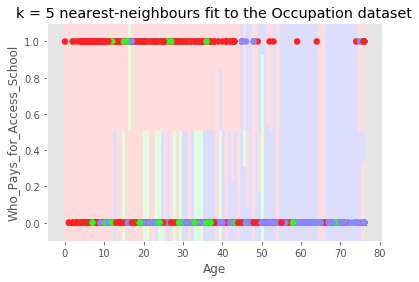

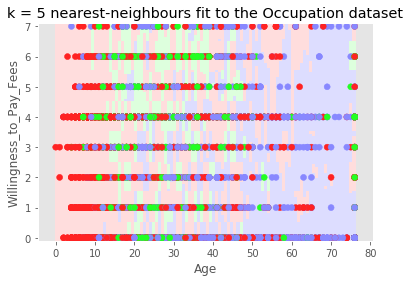

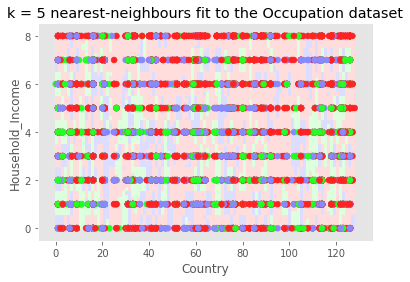

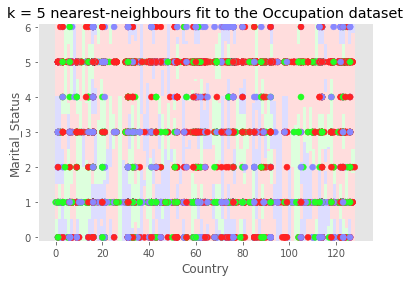

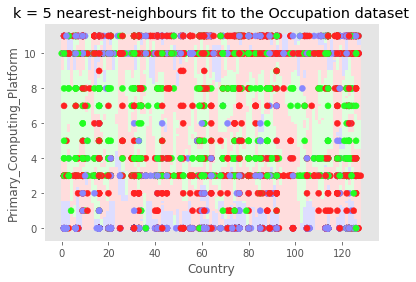

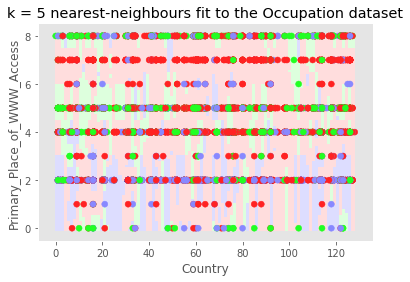

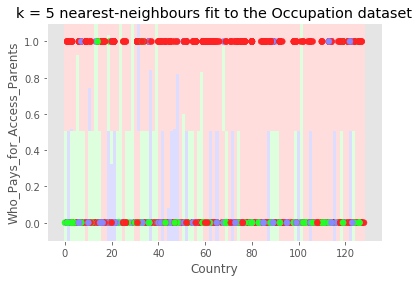

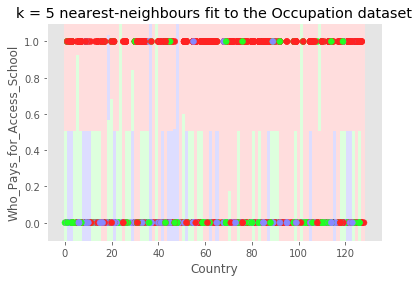

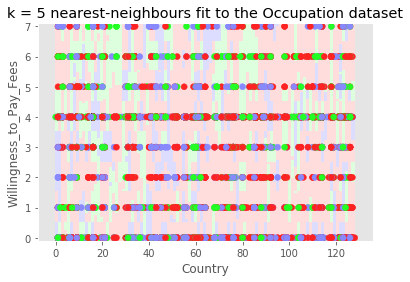

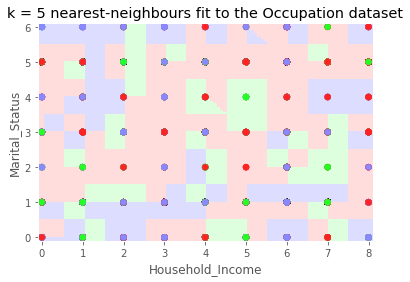

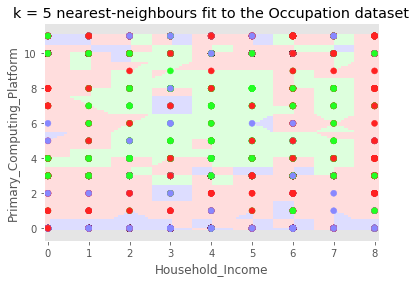

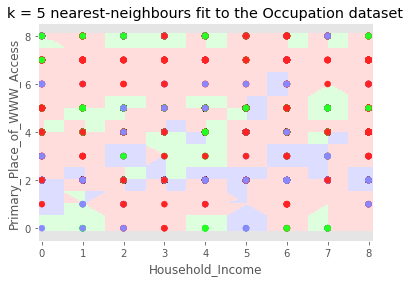

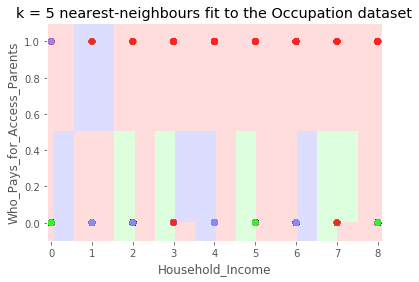

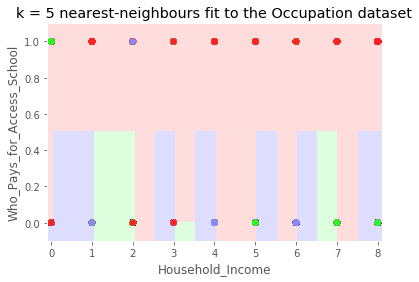

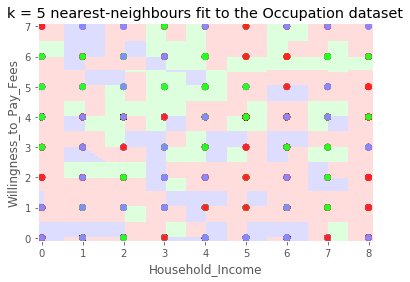

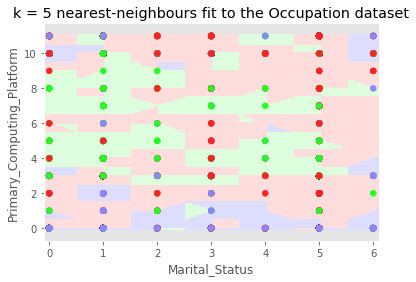

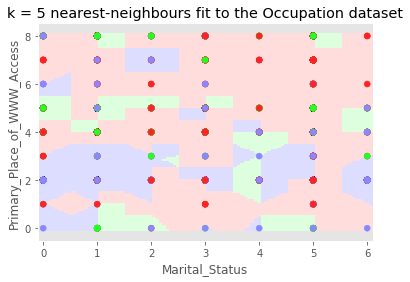

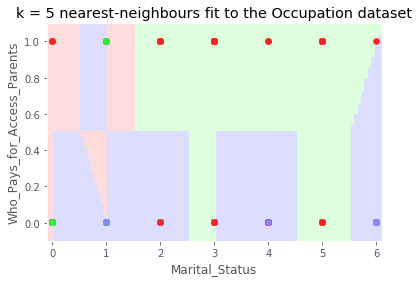

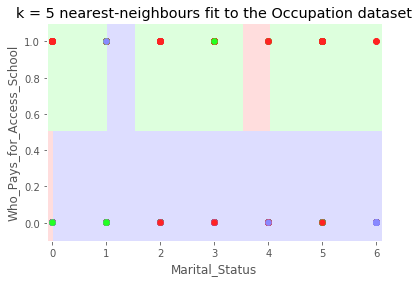

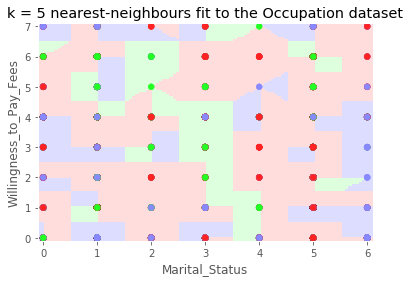

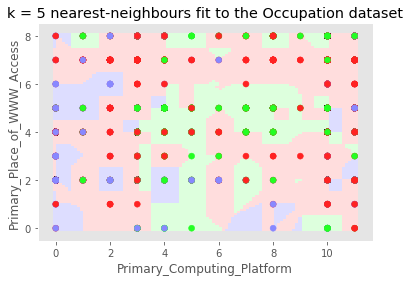

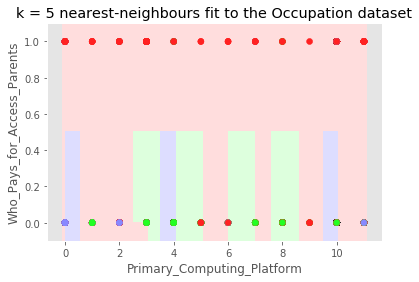

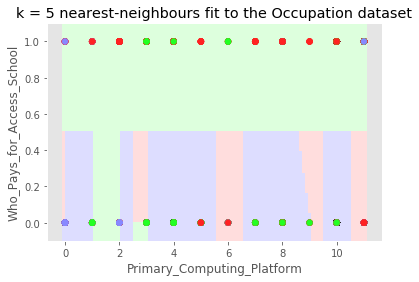

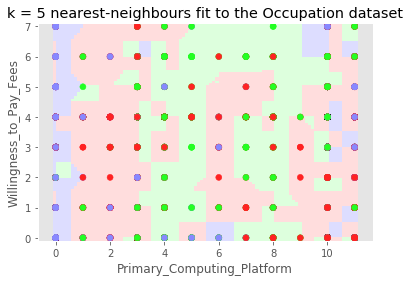

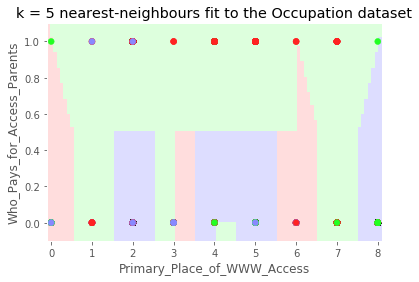

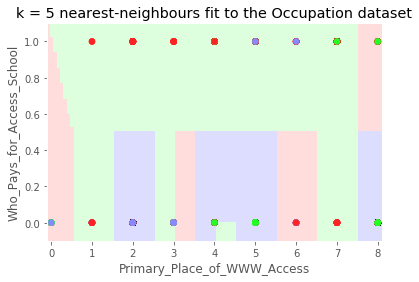

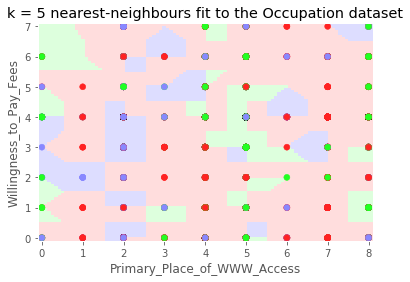

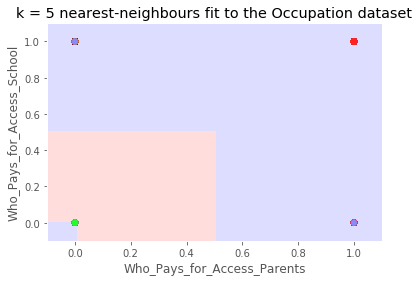

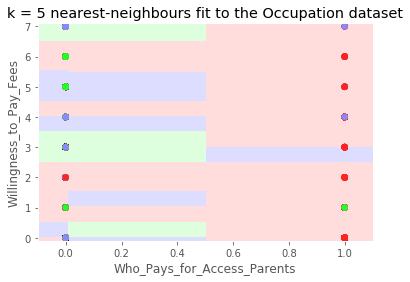

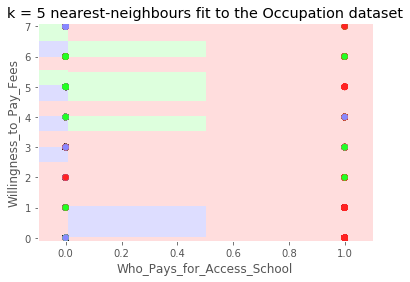

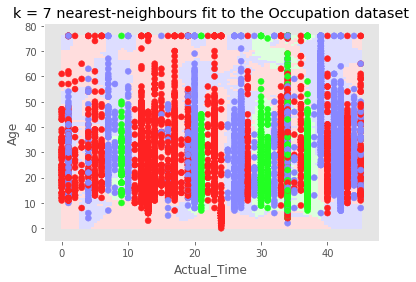

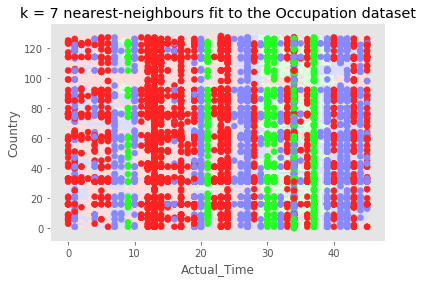

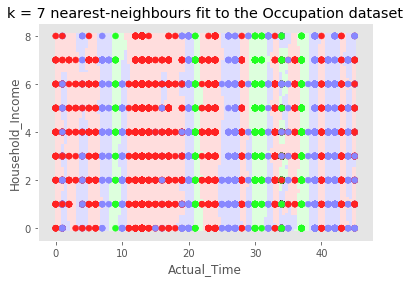

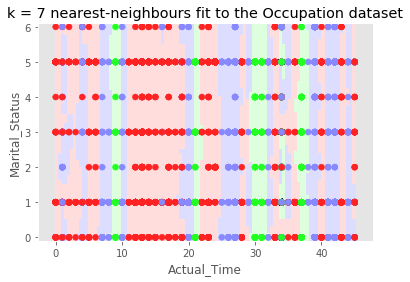

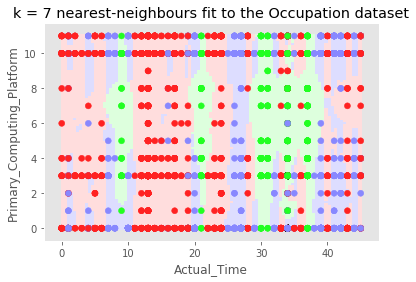

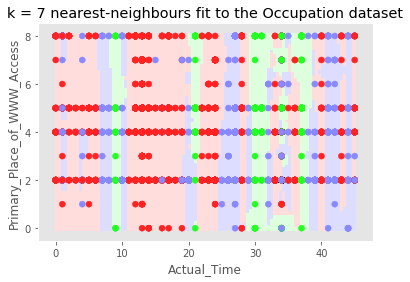

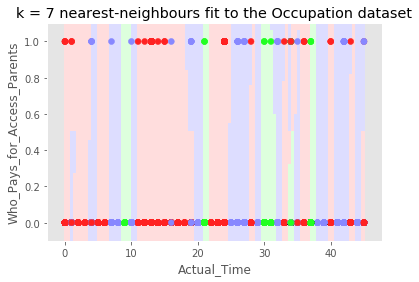

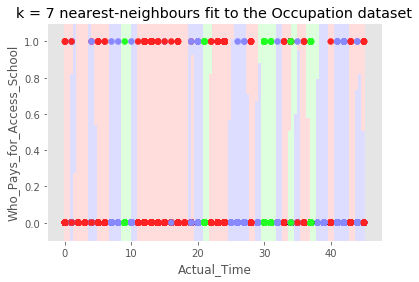

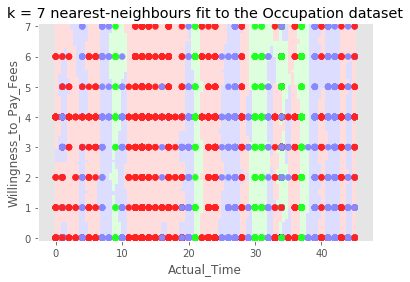

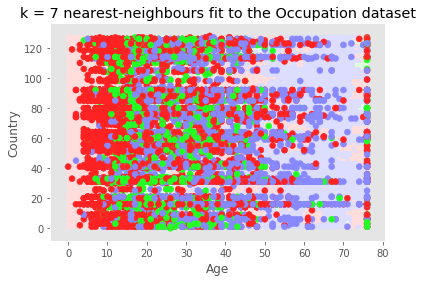

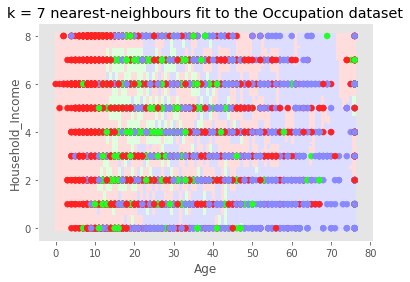

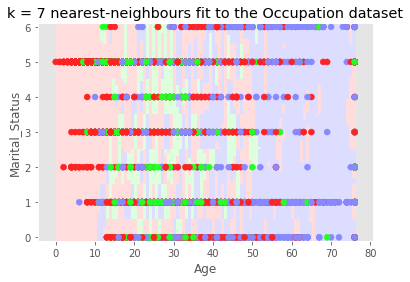

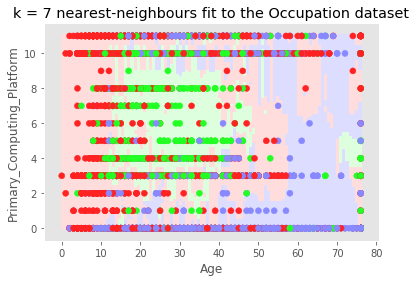

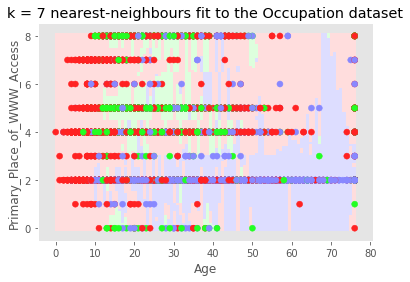

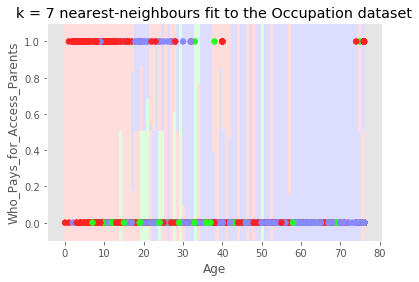

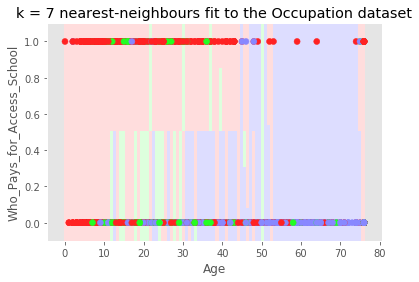

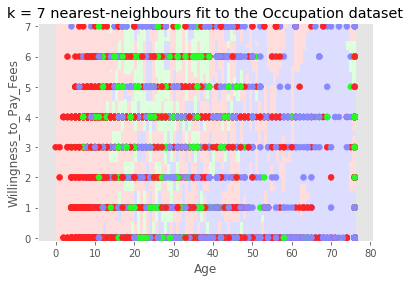

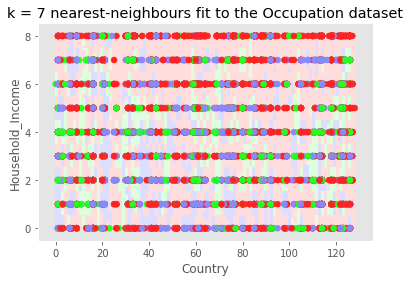

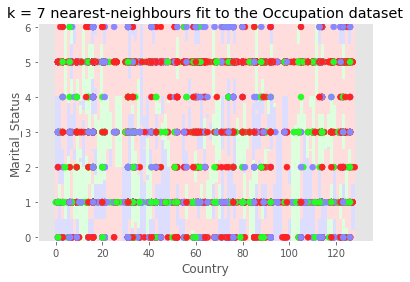

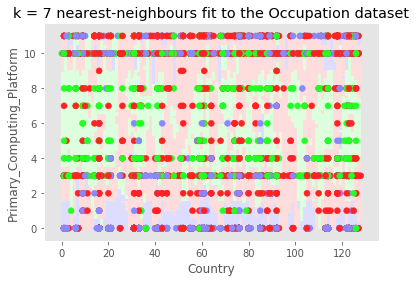

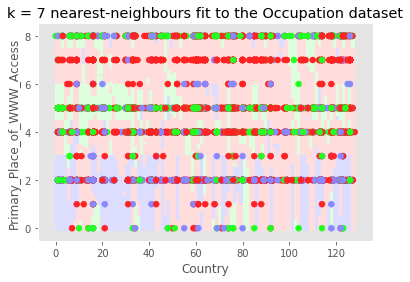

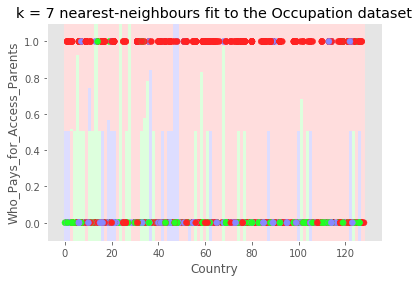

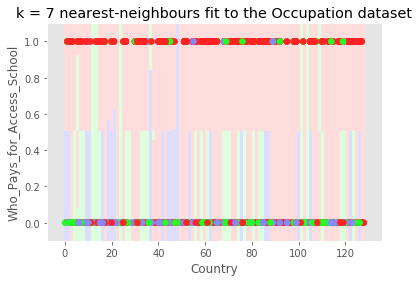

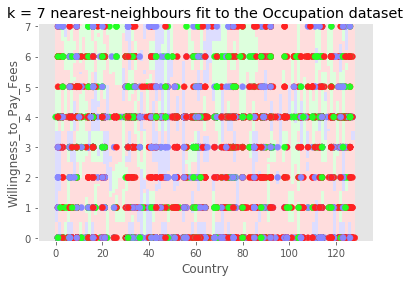

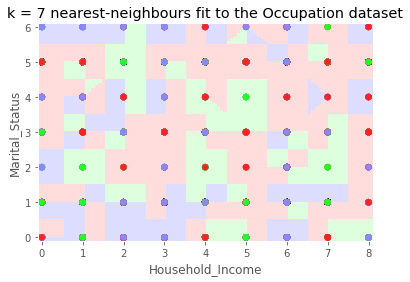

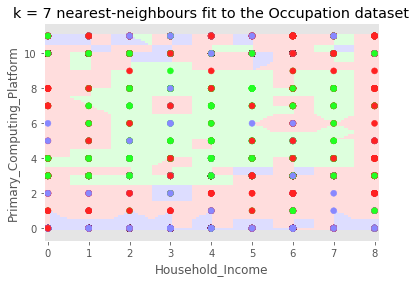

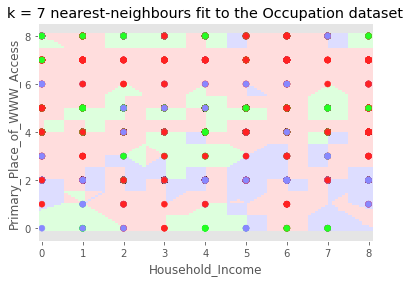

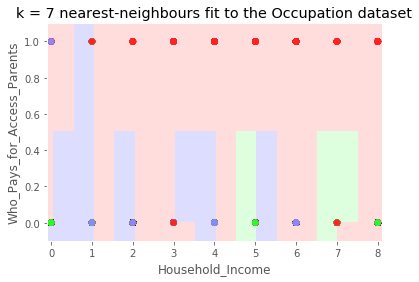

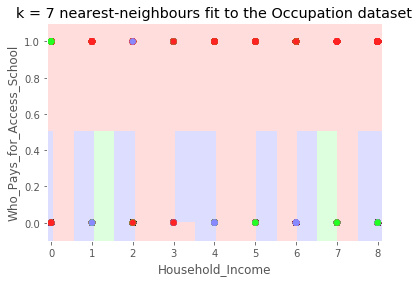

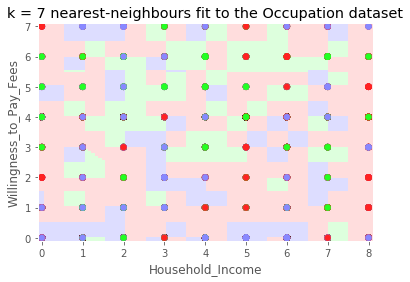

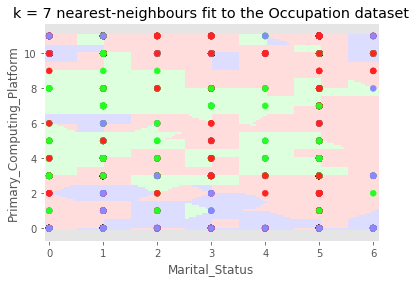

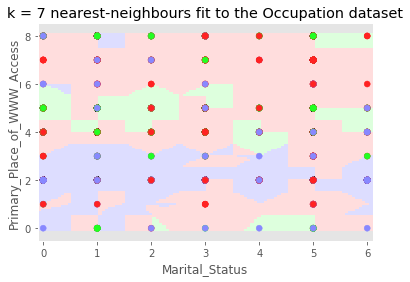

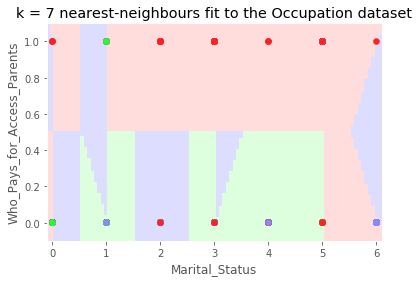

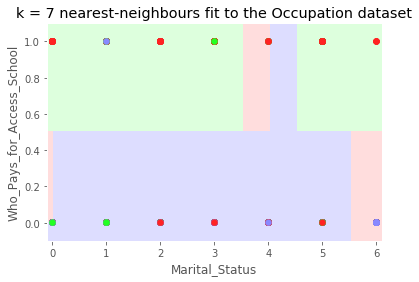

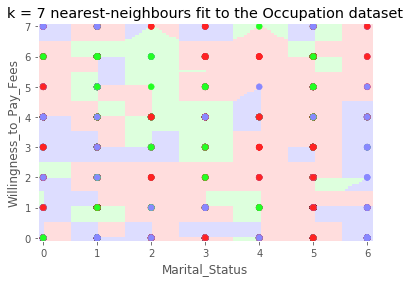

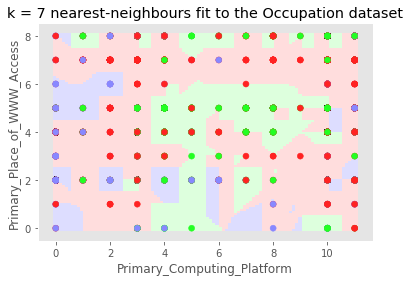

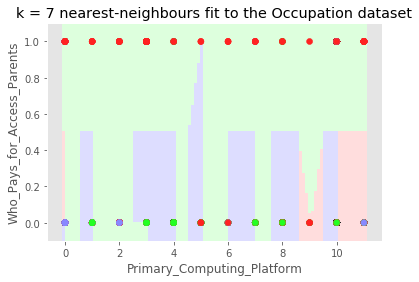

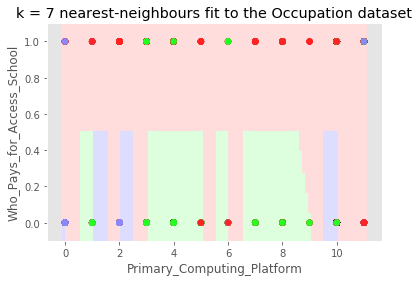

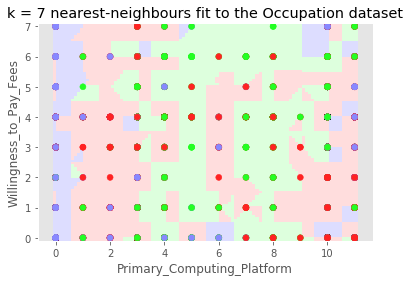

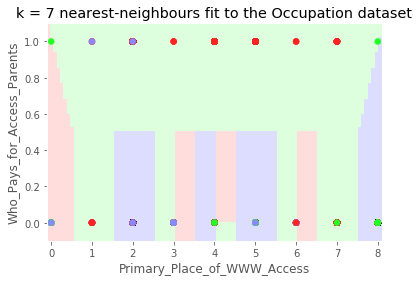

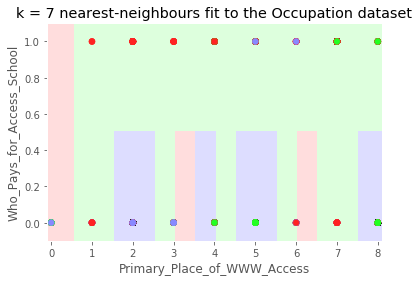

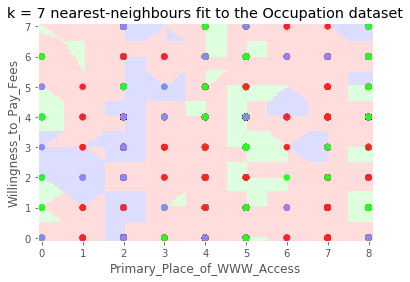

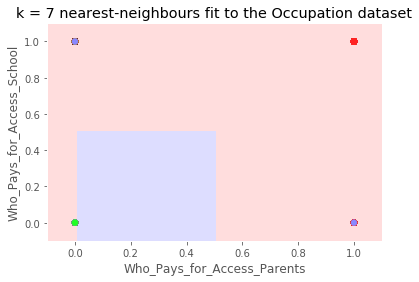

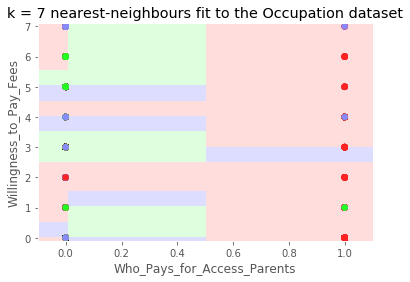

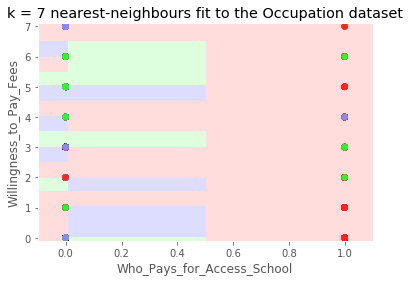

In [6]:
# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFDDDD', '#DDFFDD', '#DDDDFF'])
cmap_bold = ListedColormap(['#FF2222', '#22FF22', '#8888FF'])

predNames = list(featureDF.columns)

df=pd.DataFrame(featureDF, columns=predNames)
nTrain = df.shape[0]
y = originalDF['Major_Occupation']

pattern = re.compile('[\W_]+', re.UNICODE) # https://stackoverflow.com/a/1277047
for neighborCnt in range(3,8,2): # from 3 to a maximum of 8, in steps of 2, so 3,5,7
  knn = neighbors.KNeighborsClassifier(n_neighbors=neighborCnt)
  for twoCols in itertools.combinations(predNames, 2): # https://stackoverflow.com/a/374645
    X = df[list(twoCols)]  # we only take two features at a time
    colNames = X.columns
    c1 = colNames[:1][0] # first of 2
    c2 = colNames[-1:][0] # last of 2
    c1 = pattern.sub("",c1.title()) # Make titlecase, then remove non-alphanumeric characters
    c2 = pattern.sub("",c2.title())
    knn.fit(X, y)
    plotTitle = "k = %i %s fit to the %s dataset" % (neighborCnt, "nearest-neighbours", "Occupation")
    fileTitle = "k-nearest/majoroccupation/k_%i_%s_%s_%s_%s.pdf" % (neighborCnt, "nearest-neighbours", "Occupation", c1, c2)
    print("Plotting file %s" % (fileTitle))
    plot_2d_class(X, y, nTrain, knn, plotTitle, fileTitle, cmap_light, cmap_bold)



## Model Validation

Next we validate the k-nearest-neighbours classification "model". Clearly, the parameter $k$ is critical to its performance. Generally, smaller values of $k$ fit the training set more accurately (less bias) but generalise less well to test data (more variance). The opposite applies to larger values of $k$.

With $k$ set to its minimum value ($k = 1$), it fits the training almost exactly (95%) and the confusion matrix is optimal. This is because the object is simply assigned to the class of that single nearest neighbor.:

In [7]:
from sklearn.neighbors import KNeighborsClassifier
X, y = featureDF, originalDF['Major_Occupation']
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X, y)
y_pred1 = knn1.predict(X)
print("Accuracy:",metrics.accuracy_score(y, y_pred1))

Accuracy: 0.9994064107637515


The *confusion matrix* highlights where classification differences arise, as these occur on the off-diagonal elements of the matrix:

In [8]:
print(accuracy_score(y, y_pred1))
print(confusion_matrix(y, y_pred1))
print(classification_report(y, y_pred1, digits=3))

0.9994064107637515
[[2162    0    1    0    0]
 [   0 2339    0    0    0]
 [   0    0 2085    0    0]
 [   0    0    1 2337    1]
 [   1    0    0    2 1179]]
              precision    recall  f1-score   support

           1      1.000     1.000     1.000      2163
           2      1.000     1.000     1.000      2339
           3      0.999     1.000     1.000      2085
           4      0.999     0.999     0.999      2339
           5      0.999     0.997     0.998      1182

   micro avg      0.999     0.999     0.999     10108
   macro avg      0.999     0.999     0.999     10108
weighted avg      0.999     0.999     0.999     10108



All training samples for each class are identified near correctly at 95% accuracy, when k = 1. This is in line with the "too good to be true" result analysis for setting k so low.

Next we split the training data into a _training set_ and a _testing set_ in order to evaluate the performance of a lower amount of data. Now we can use the train_test_split function in order to make the split. The test_size=0.2 inside the function indicates the percentage of the data that should be held over for testing. It’s usually around 80/20 so I have gone with 0.2.

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, stratify=y)
knn1.fit(Xtrain, ytrain)
ypred1s = knn1.predict(Xtest)
print(accuracy_score(ytest, ypred1s))
print(confusion_matrix(ytest, ypred1s))
print(classification_report(ytest, ypred1s, digits=3))

0.5573689416419386
[[180  30  61 112  50]
 [ 31 385  18  25   9]
 [ 80  16 239  42  40]
 [117  20  57 227  47]
 [ 45   7  39  49  96]]
              precision    recall  f1-score   support

           1      0.397     0.416     0.406       433
           2      0.841     0.823     0.832       468
           3      0.577     0.573     0.575       417
           4      0.499     0.485     0.492       468
           5      0.397     0.407     0.402       236

   micro avg      0.557     0.557     0.557      2022
   macro avg      0.542     0.541     0.541      2022
weighted avg      0.560     0.557     0.559      2022



As you can see, we’re fitting the model on the training data and trying to predict the test data. The accuracy score has reduced significantly since splitting the data. Let’s see what (some of) the predictions are. Note: because I used [0:5] after predictions, it only showed the first five predicted values. Removing the [0:5] would have made it print all of the predicted values that our model created.

The results show that our KNN algorithm was able to classify 2022 records in the test set with 34% accuracy, which is not optimal. The alrogithm has not performed very well with this dataset on the initial split

In [10]:
for result in ypred1s[0:5]:
    for key, val in occupation_values['Major_Occupation'].items():
        if val == result:
            print(key)

Professional
Computer
Education
Computer
Other


Next I iterated over the range of 1 to 30 for my k value in order to view the prediction accuracy scores for the model at different k ranges.

In [11]:
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(Xtrain, ytrain)
    pred_i = model.predict(Xtest)
    w = accuracy_score(ytest, pred_i)
    print(i)
    print(w)

1
0.5573689416419386
2
0.5346191889218596
3
0.5573689416419386
4
0.5667655786350149
5
0.5727002967359051
6
0.5806132542037586
7
0.5840751730959446
8
0.582591493570722
9
0.5820969337289812
10
0.5939663699307616
11
0.5914935707220573
12
0.592482690405539
13
0.5781404549950544
14
0.5905044510385756
15
0.5806132542037586
16
0.5766567754698319
17
0.5702274975272008
18
0.5736894164193868
19
0.5692383778437191
20
0.5657764589515332
21
0.5712166172106825
22
0.5657764589515332
23
0.5637982195845698
24
0.5618199802176064
25
0.5628090999010881
26
0.5534124629080118
27
0.5489614243323442
28
0.5489614243323442
29
0.5479723046488625


### Ten Fold Cross Validation

Next we want to validate our model using cross validation. We specifiy that we are performing 10 folds with the cv=10 parameter and that our scoring metric should be accuracy since we are in a classification setting.

In [12]:
# creating odd list of K for KNN
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=10)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.56663376 0.55676209 0.55039526 0.56379822 0.54599407 0.55247525
 0.58118812 0.57227723 0.56732673 0.54960317]
cv_scores mean:0.5606453897018622


Using cross-validation, our mean score is about 37.9%. This is a more accurate representation of how our model will perform on unseen data than our earlier testing using the holdout method.

Then, I plotted the error rate versus K values to again evaluate optimal k.

In [13]:
error_rate = []
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain, ytrain)
    pred_i = knn.predict(Xtest)
    error_rate.append(np.mean(pred_i != ytest))

Text(0, 0.5, 'Error Rate')

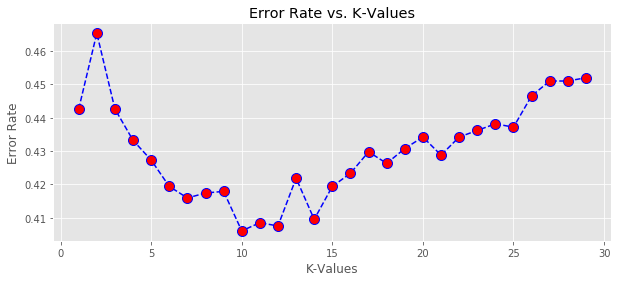

In [14]:
# Configure and plot error rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(1,30), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

Using the error rate I learned that the error rate versus k-value begins to lower after the k=17 mark and then nearly levels out. That is quite a high k value and is not considered optimal.

For comparison, we look at the confusion matrix when  𝑘=3 . Firstly, we try with all the training data (not holding any observations back for a test set).

In [15]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X, y)
y_pred3 = knn3.predict(X)
print(accuracy_score(y, y_pred3))
print(confusion_matrix(y, y_pred3))
print(classification_report(y, y_pred3, digits=3))

0.7571230708349822
[[1685   80  128  215   55]
 [ 122 2140   32   39    6]
 [ 290   80 1632   62   21]
 [ 462  110  148 1544   75]
 [ 276   51  129   74  652]]
              precision    recall  f1-score   support

           1      0.594     0.779     0.674      2163
           2      0.870     0.915     0.892      2339
           3      0.789     0.783     0.786      2085
           4      0.798     0.660     0.723      2339
           5      0.806     0.552     0.655      1182

   micro avg      0.757     0.757     0.757     10108
   macro avg      0.771     0.738     0.746     10108
weighted avg      0.770     0.757     0.757     10108



With k = 3 we get a much improved accuracy score here of 61%.

Now we try holding back 20% of the training set for use as test observations, leaving 80% of the training data to train the classifier. We then look at what happens to the confusion matrix. The accuracy score has decreased and the confusion matrix results are lower per class of Occupation.

In [16]:
knn3.fit(Xtrain, ytrain)
ypred3s = knn3.predict(Xtest)
print(accuracy_score(ytest, ypred3s))
print(confusion_matrix(ytest, ypred3s))
print(classification_report(ytest, ypred3s, digits=3))

0.5573689416419386
[[206  30  57 105  35]
 [ 41 386  18  16   7]
 [108  15 261  26   7]
 [161  19  57 209  22]
 [ 81  11  44  35  65]]
              precision    recall  f1-score   support

           1      0.345     0.476     0.400       433
           2      0.837     0.825     0.831       468
           3      0.597     0.626     0.611       417
           4      0.535     0.447     0.487       468
           5      0.478     0.275     0.349       236

   micro avg      0.557     0.557     0.557      2022
   macro avg      0.558     0.530     0.536      2022
weighted avg      0.570     0.557     0.557      2022



## PCA Transformation

Now we reduce our feature set using PCA and compare the results.

In [17]:
XPCA, yPCA = featureDF, originalDF['Major_Occupation']
scaler = preprocessing.MinMaxScaler()
XPCA = scaler.fit_transform(XPCA)

# Now we should split our data into a training set and a test set in order to properly assess our model using PCA
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(XPCA, yPCA, random_state=1)

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [18]:
pca_model = PCA(n_components=2)
model = pca_model.fit(X_train_pca)
X_train_pca = model.transform(X_train_pca)
X_test_pca = model.transform(X_test_pca)

# 2-Dimensions
X_train_pca[:5]

array([[-0.71243338,  0.14613362],
       [-0.74119715,  0.06525705],
       [-0.19609215, -0.24133664],
       [ 0.08950378, -0.50860229],
       [-0.48460758,  0.22012104]])

In [20]:
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(X_train_pca, y_train_pca)
    pred_i = model.predict(X_test_pca)
    w = accuracy_score(y_test_pca, pred_i)
    print(i)
    print(w)

1
0.39849624060150374
2
0.40878512069647804
3
0.43173723783142065
4
0.44954491491887616
5
0.45429362880886426
6
0.45468935496636326
7
0.46537396121883656
8
0.4709141274238227
9
0.4705184012663237
10
0.4669568658488326
11
0.47249703205381877
12
0.47685001978630787
13
0.46893549663632766
14
0.46616541353383456
15
0.46933122279382666
16
0.47249703205381877
17
0.4717055797388207
18
0.4677483181638306
19
0.4713098535813217
20
0.4709141274238227
21
0.47724574594380686
22
0.482390185991294
23
0.4855559952512861
24
0.48436881677878907
25
0.48080728136129797
26
0.4859517214087851
27
0.48120300751879697
28
0.48080728136129797
29
0.48357736446379107


In [21]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_pca, y_train_pca) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [22]:
y_predict = knn_model.predict(X_test_pca)
y_predict

print(accuracy_score(y_test_pca, y_predict))
print(confusion_matrix(y_test_pca, y_predict))
print(classification_report(y_test_pca, y_predict, digits=3))

0.43173723783142065
[[242  80 100 115  28]
 [112 382  48  18  12]
 [190  66 196  49  24]
 [204  44  56 248  22]
 [126  23  63  56  23]]
              precision    recall  f1-score   support

           1      0.277     0.428     0.336       565
           2      0.642     0.668     0.655       572
           3      0.423     0.373     0.397       525
           4      0.510     0.432     0.468       574
           5      0.211     0.079     0.115       291

   micro avg      0.432     0.432     0.432      2527
   macro avg      0.413     0.396     0.394      2527
weighted avg      0.435     0.432     0.425      2527



Performance is significantly reduced on k = 3 in comparison with a non PCA reduced dataset as we saw earlier which scored 61%

Because we used principle component analysis to reduce the dimensions, we can use our model to plot the decision boundaries based on our training data and 
where our test data falls relative to these boundaries

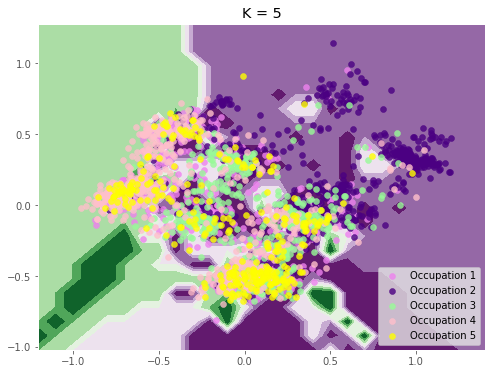

In [24]:
k = 5
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
padding = 0.1
resolution = 0.1

colors = {1: 'violet', 2: 'indigo', 3: 'palegreen', 4: 'pink', 5: 'yellow'}
x_min, x_max = X_train_pca[:, 0].min(), X_train_pca[:, 0].max()
y_min, y_max = X_train_pca[:, 1].min(), X_train_pca[:, 1].max()
x_range = x_max - x_min
y_range = y_max - y_min
x_min -= x_range * padding
y_min -= y_range * padding
x_max += x_range * padding
y_max += y_range * padding

# Get decision boundaries from model
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                     np.arange(y_min, y_max, resolution))

Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour map
plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn)
plt.axis('tight')

# Plot your testing points as wel
for label in np.unique(y_test_pca):
    indices = np.where(y_test_pca == label)
    plt.scatter(X_test_pca[indices, 0], X_test_pca[indices, 1], c=colors[label], alpha=0.8, 
                label='Occupation {}'.format(label))

plt.legend(loc='lower right')
plt.title('K = {}'.format(k))
plt.show()

# Performance and Comparison:

In summary k-nearest neighbors has been performed on both a normal and PCA reduced data set for comparison in this analysis for Major Occupation prediction.

Performance
* k-nearest neighbours did not perform very well for this data set it is clear. 
* It did have a good performance for k=3 on the model which was not split into training and test.
* It appears that the reduction in data reduced the accuracy of the model.
* PCA did not help performance of this predictor overall either, this did not provide improvement in the model accuracy.
* There was possibly too much distance and noise in the dataset despite best efforts to convert and reduce the feature subset.
* Suspected Overfitting despite efforts against this. (low bias(accuracy scores) but high variance(confusion matrix) were encountered)

Comparison
* Compared to the other algorithms used (Decision tree and RandomForest) It has the benefit that it does not require training for making predictions, which is typically one of the most difficult parts of a machine learning algorithm.

